In [1]:
from IPython.display import Image

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
cd

/Users/ummuhandemir


In [4]:
cd Documents

/Users/ummuhandemir/Documents


In [5]:
cd GitHub

/Users/ummuhandemir/Documents/GitHub


## Distribution - types and tips

##### when data is continuous we can visually analyse the spread, as well as relationships between variables, to learn lessons about the sample data and the population it ultimately represents

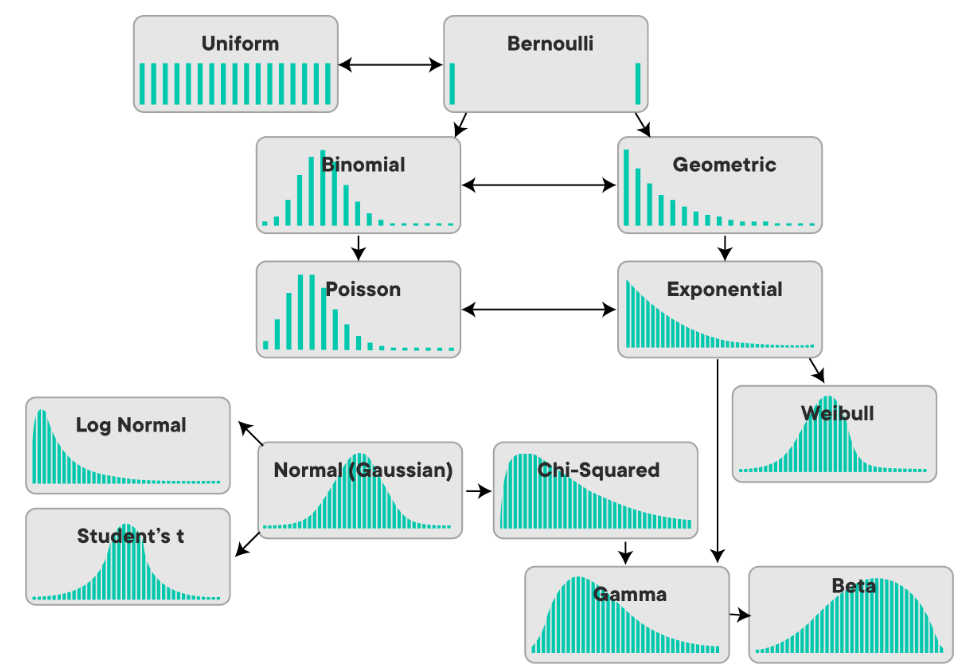

In [6]:
Image("Imagesfornotebook/diff distributions.png")

#### Histograms 

A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal. It can also show any outliers or gaps in the data. In brief, a histogram summarizes the distribution properties of a continuous numerical variable.

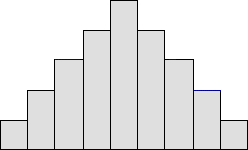

In [7]:
Image("Imagesfornotebook/normal.gif") # the normal or gaussian distribution

Rules:
* symmetric bell shape.
* mean and median are equal; both located at the center of the distribution.
* approx 68% percent of the data falls within 1 standard deviation of the mean.
* (hint for next week - machine learning algorithms love Gaussian)

In [8]:
#Can you think of an example of such a distribution in the real world?


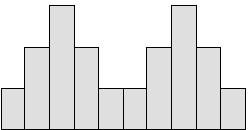

In [9]:
Image("Imagesfornotebook/bimodal.gif")

Rules: 

* two visible peaks
* may indicate two systems or sources of data
* recommended to split the two peaks out and deal with them separately 
* this can be handled during data wrangling 

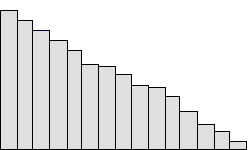

In [10]:
Image("Imagesfornotebook/skew-right.gif")

A distribution skewed to the right is said to be positively skewed.

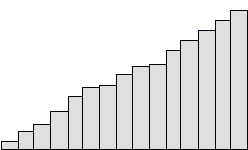

In [11]:
Image("Imagesfornotebook/skew-left.gif")

A distribution skewed to the left is said to be negatively skewed

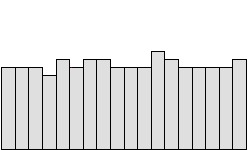

In [12]:
Image("Imagesfornotebook/uniform.gif")

A uniform distribution, as shown below, provides little information.
It may describe a distribution which has several modes (peaks). 
If your histogram has this shape, check to see if several sources of variation have been combined. If so, analyze them separately. If multiple sources of variation do not seem to be the cause of this pattern, different groupings can be tried to see if a more useful pattern results. 

In [13]:
#Can you think of an example of such a distribution in the real world?


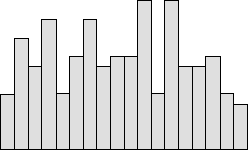

In [14]:
Image("Imagesfornotebook/random.gif")

This type has no apparent pattern.  Like the uniform distribution, it may describe a distribution that has several modes (peaks), hiding several combined sources of variation or would benefit from groupings.

Lets download some penguin data from [here](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

In [15]:
# create df from csv 
df = pd.read_csv('archive/penguins_size.csv')


In [16]:
# review the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:>

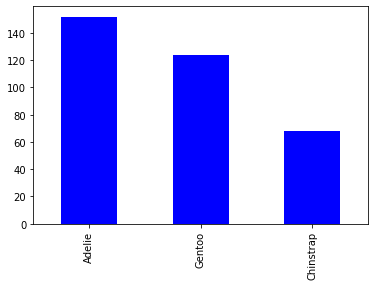

In [18]:
df['species'].value_counts().plot(kind='bar',color='blue')

<AxesSubplot:>

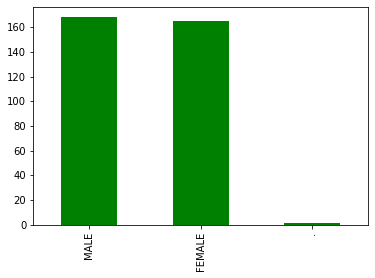

In [19]:
df['sex'].value_counts().plot(kind='bar',color='green')

<AxesSubplot:>

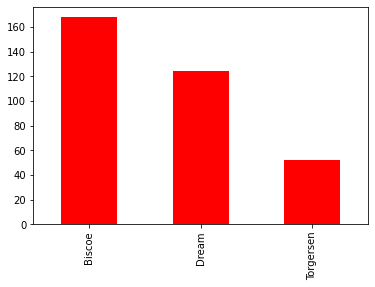

In [20]:
df['island'].value_counts().plot(kind='bar',color='red')

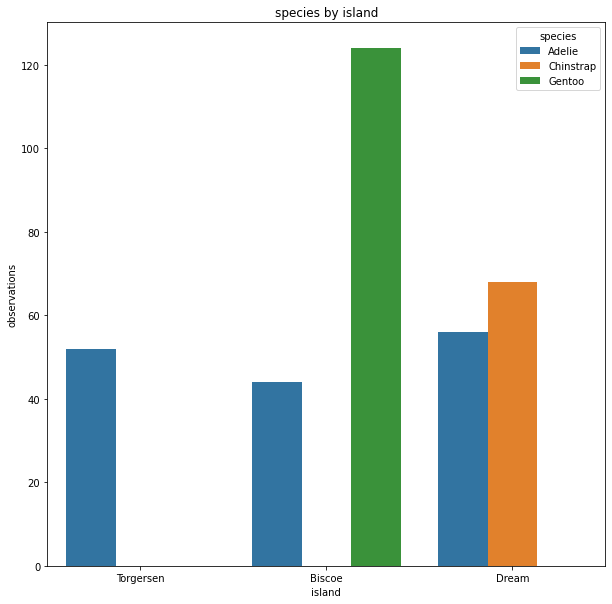

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'island',hue='species',data=df)
plt.ylabel('observations')
plt.title('species by island')
plt.show()

### challenge

- create a catplot (SNS)
- kind is bar
- showing species, bodymassi and (bonus) gender

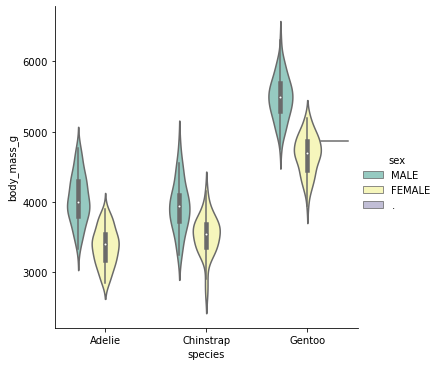

In [22]:
sns.catplot(x='species',y='body_mass_g',hue='sex',kind='violin',data = df, palette="Set3",dodge = True)


In [23]:
#create a sub data frame of the numeric variables "dfnum"
#that you want to analyse next to eachother
dfnum = df._get_numeric_data()
dfnum


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


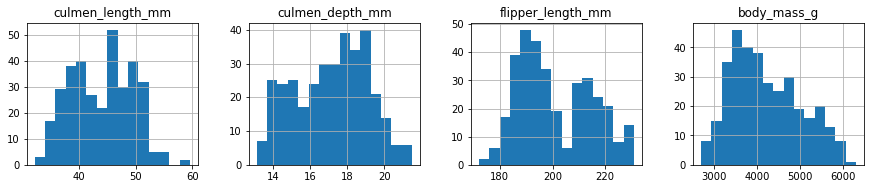

In [47]:
#create all histograms 
dfnum.hist(bins=15, figsize=(15, 6), layout=(2, 4));


TASK : summarise in bullet points what type of distribution we see for each variable and what we can interpret from them:

* in culmen_length data there are some outliers. It is unimodal, random distribution.
* culmen_depth data seems random and unimodal.
* flipper_length data is unimodal and random.
* body_mass data is skewed to the right, unimodal

###  in pairs challenge - analyse the spread of fields in an unknown data set, following the same process

- try to pick a data set with at least 3 numerical columns 

places to get (clean,easy to use) data;

* data world
* kaggle 
* london data store
* ... there are others

### Scatter plots 

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

Identification of correlational relationships are common with scatter plots. In these cases, we want to know, if we were given a particular horizontal value, what a good prediction would be for the vertical value. You will often see the variable on the horizontal axis denoted an independent variable, and the variable on the vertical axis the dependent variable. Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

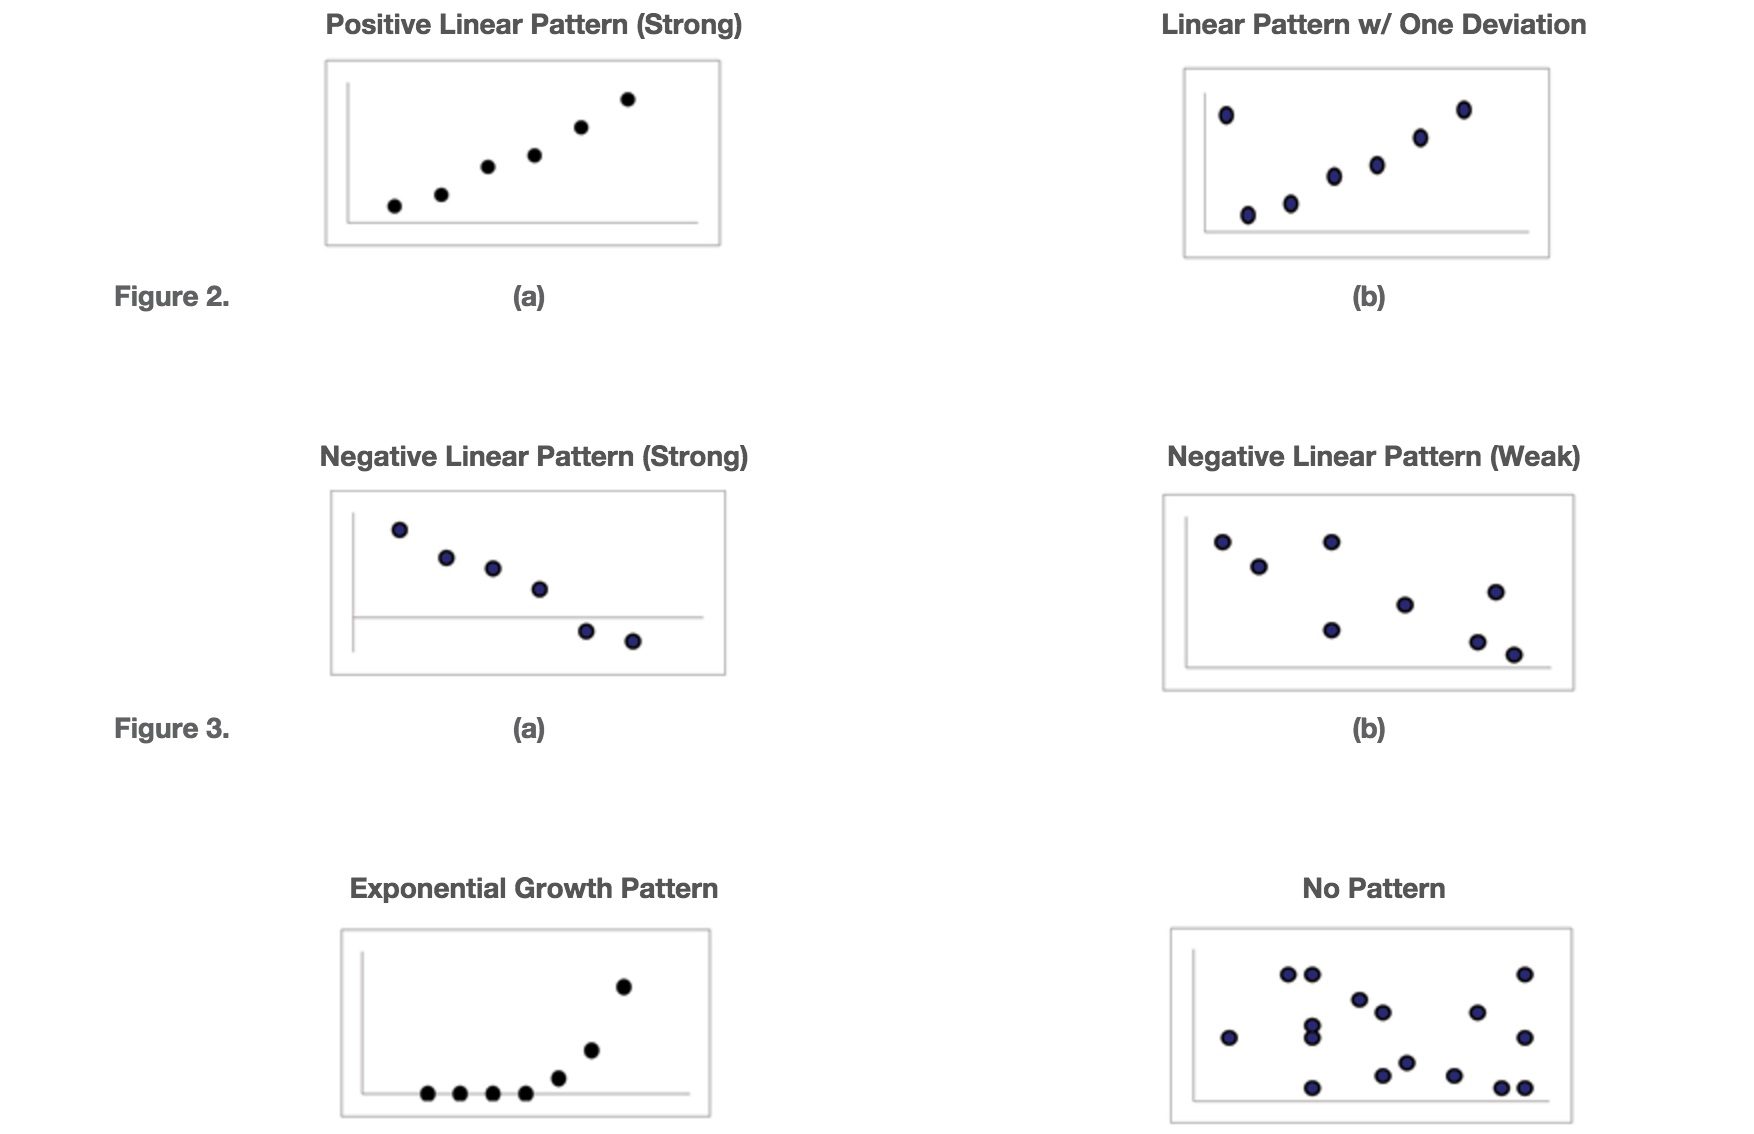

In [28]:
Image("Imagesfornotebook/scatter.png")

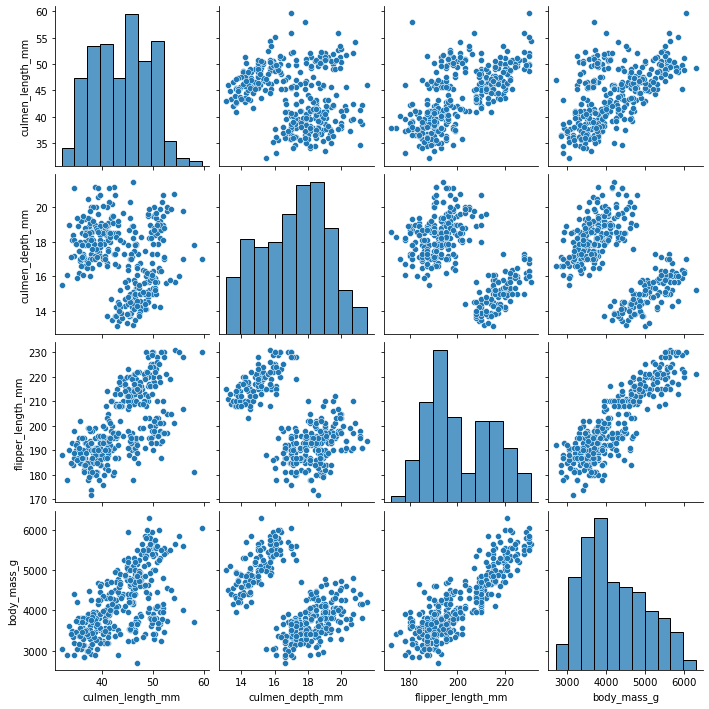

In [29]:
# all scatter plots as a matrix using pairplot

sns.pairplot(dfnum)


TASK summarise in bullet points what important relationships you observe see and what you can interpret/infer from them:

* eg. there is a relationship between x and y. This suggests that y rises when x rises 
* there is strong positive linear corelation between body mass and flipper length. This suggests their behavior are the same.
*  culmen length and flipper length have a weak positive linear corelation.
*


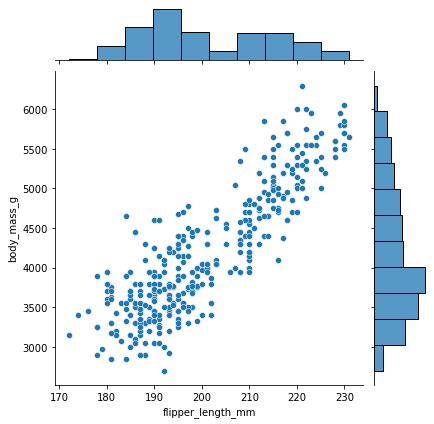

In [31]:
#focusing on one relationship - you could also use different visual methods 
# example jointplot 
sns.jointplot(x=dfnum['flipper_length_mm'], y=dfnum['body_mass_g'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

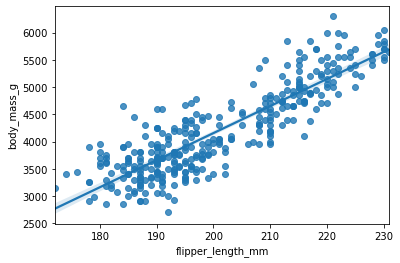

In [32]:
#if you think there is a correlation, plot a trend line with the scatter 
# example regplot 

sns.regplot(x='flipper_length_mm', y='body_mass_g', data=dfnum)

### Quick health warning on scatter plots - correlation v causation 

This is not so much an issue with creating a scatter plot as it is an issue with its interpretation. 

Simply because we observe a relationship between two variables in a scatter plot, it does not mean that changes in one variable are responsible for changes in the other. This gives rise to the common phrase in statistics that correlation does not imply causation. 

It is possible that the observed relationship is driven by some third variable that affects both of the plotted variables, that the causal link is reversed, or that the pattern is simply coincidental.

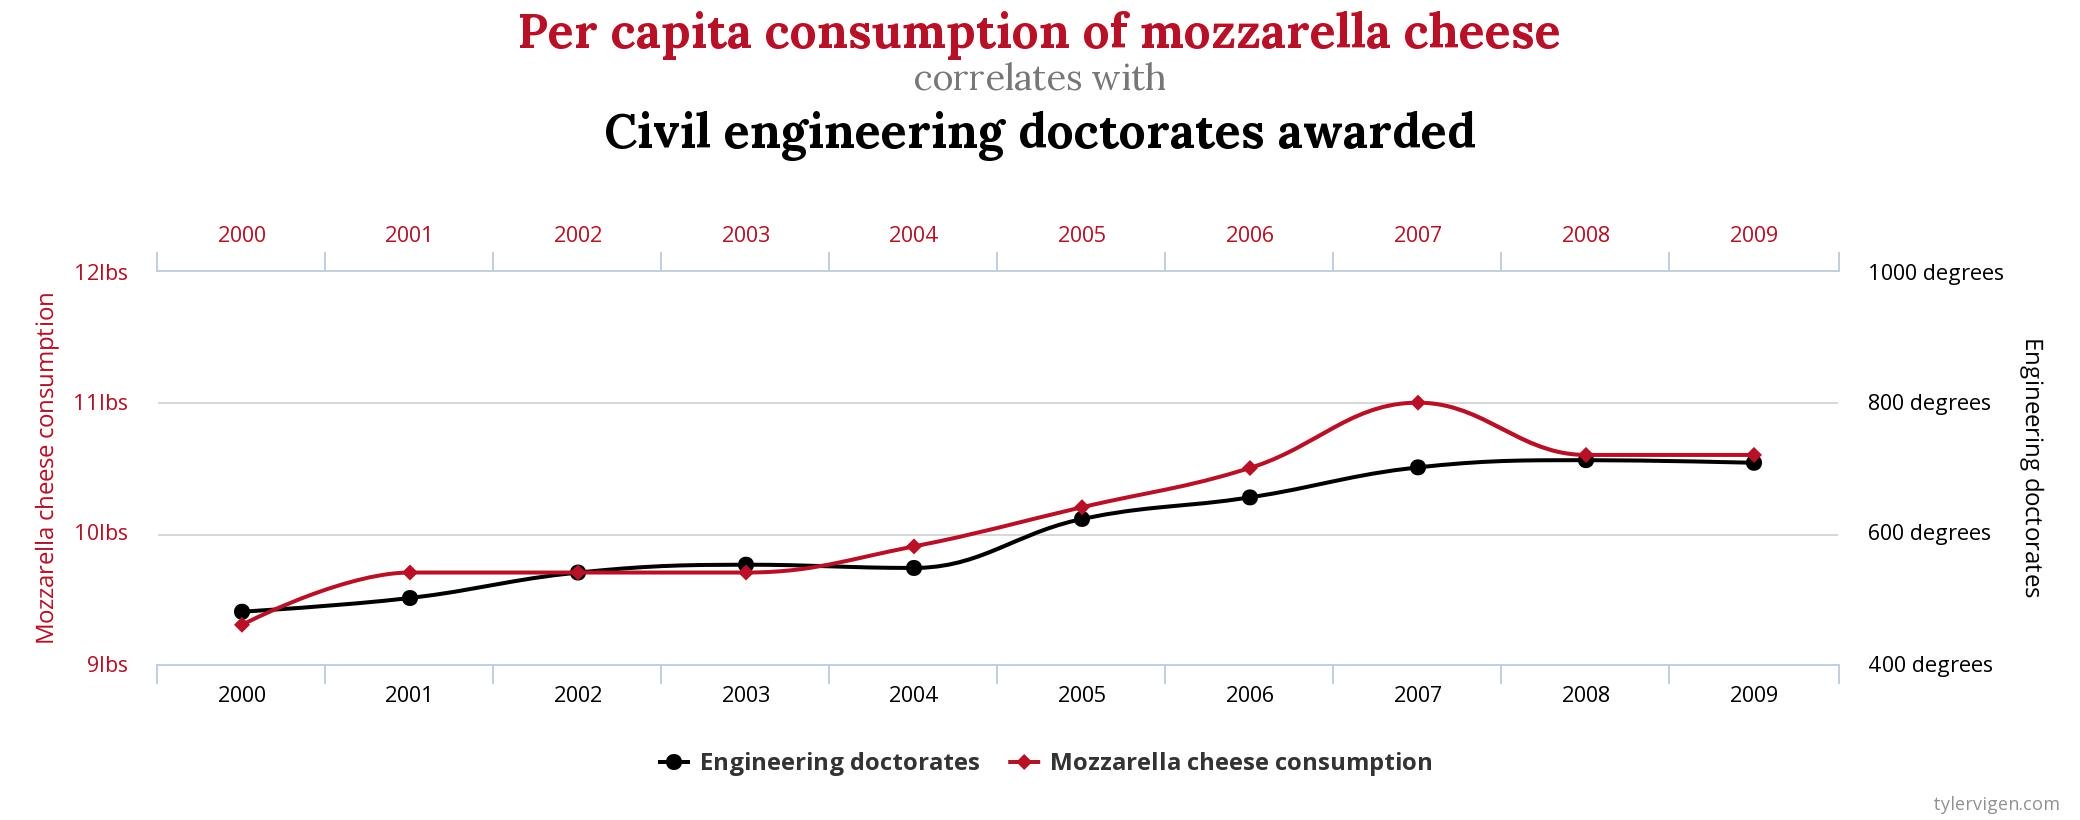

In [33]:
Image("Imagesfornotebook/cheese.jpeg")

## Correlation - the very awesome correlation matrix

In [36]:
#create a correlation matrix of numerical columns
#without any unique info like ids

corr_data = dfnum
correlations_matrix = corr_data.corr()
correlations_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

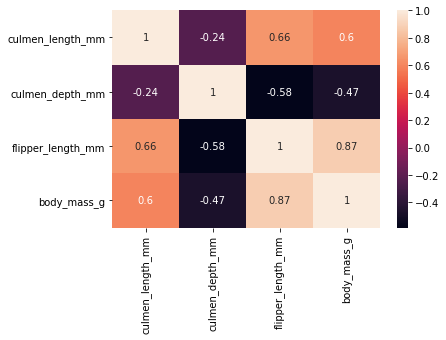

In [37]:
#create a heatmap to visually interrogate the relationships 
sns.heatmap(correlations_matrix,annot= True)


### What is Multicollinearity and when is it a problem? 

Multicollinearity occurs when independent variables in a regression model are highly correlated. 

This correlation is a problem because independent variables should be independent. 

If the degree of correlation between variables is high enough, it can cause problems when you fit a machine learning model and interpret the results.

example - if I was trying to predict the number of bikes that would be rented in berlin by a sample of students, having other columns in my dataset "loves cycling" and "has no bike" and "normally rents a bike" would certainly have strong multicollinearity and wouldnt really tell me anything interesting other than those columns are good predictors of bike rental. Its a bit of a so what. 

The interesting thing would be if other factors such as age, fitness, access to a vehicle, location, weather conditions could be used to make predictions. 


## Box plots 

In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

An outlier is an observation that is numerically distant from the rest of the data. Outliers can be identified easily using box plots because outliers are a data point that are visually located outside the whiskers of the box plot.

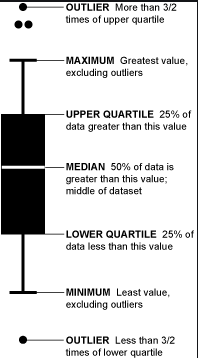

In [38]:
Image('Imagesfornotebook/boxplot.png')

<AxesSubplot:>

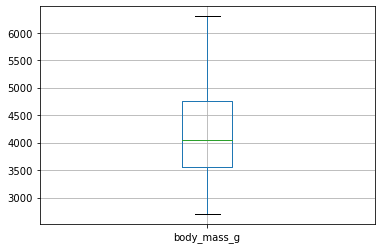

In [41]:
#standard box plot of body mass
dfnum.boxplot(['body_mass_g'])


In [ ]:
#seaborn horizonal boxplot of body mass- can be easier to read 

sns.boxplot(x= dfnum['body_mass_g'])

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

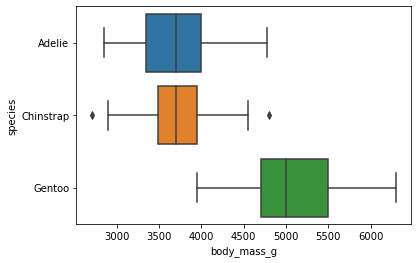

In [43]:
#shorthand to create a boxplot with multiple categories 

sns.boxplot(x="body_mass_g", y="species", data=df)

<AxesSubplot:xlabel='body_mass_g', ylabel='island'>

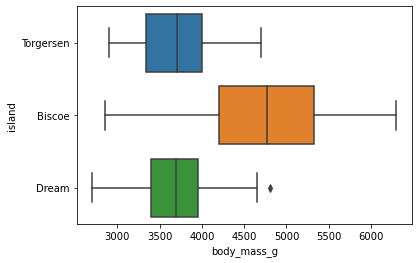

In [45]:
sns.boxplot(x="body_mass_g", y="island", data=df)

TASK- summarise in bullet points what can be seen from the boxplots above:

* data for penguins from torgersen and dream island seem correlated. 
* There is an outlier in dream island.
* Range of body mass in biscoe is largest.